# Query and Visualize 311 Data based on NTA's


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\cansu\.conda\envs\Data_Analysis\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import NTA Data

<AxesSubplot:>

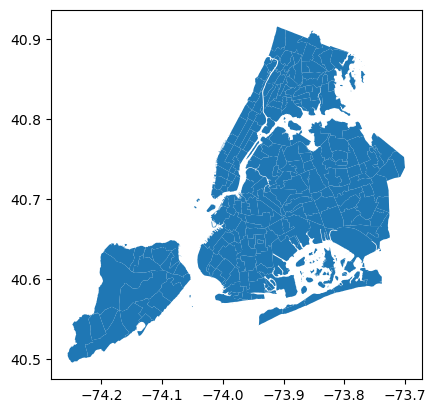

In [2]:
nta_path = r"D:\DATA\NTA\2010 Neighborhood Tabulation Areas (NTAs).geojson"
ntas = gpd.read_file(nta_path)

ntas.plot()

## Import Sensor Data to find NTA's that have sensors in them

(-74.28337047814922, -73.67222994821337, 40.47516404814219, 40.93650271647436)

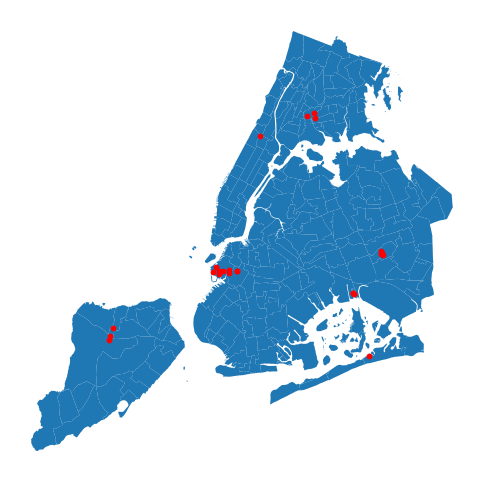

In [3]:
import os 

folder_path = r'D:\WORK\FLOODNET\SensorData'
flood_files = [f for f in os.listdir( folder_path) if f.endswith('.csv')]

flood_data = pd.read_csv(os.path.join(folder_path, flood_files[-3]), engine='pyarrow')

sensor_locations = flood_data.groupby('deployment_id').agg({
    'lat': 'first',
    'lon': 'first',
    'sensor_display_name': 'first'
})

sensor_geo = gpd.GeoDataFrame(sensor_locations, geometry=gpd.points_from_xy(sensor_locations.lon, sensor_locations.lat), crs=4326 )

fig,ax = plt.subplots(figsize=(6,6))
ntas.plot( ax=ax , zorder = 1)
sensor_geo.plot( ax=ax, zorder = 2 , markersize = 10, color = 'red' )
plt.axis('off')

C:\Users\cansu\AppData\Local\Temp\ipykernel_20520\4210817341.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  sensor_geo = sensor_geo[ ~sensor_geo['sensor_display_name'].str.contains('(RETIRED)' ) ]


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,index_right,deployment_id,lat,lon,sensor_display_name
23,QN01,39971928.7066,081,South Jamaica,32122.552258,Queens,4,"MULTIPOLYGON (((-73.77396 40.69981, -73.77446 ...",18,tired_red_monkey,40.691989,-73.792461,Q - Brinkerhoff Ave/157th St
36,MN09,20153942.4143,061,Morningside Heights,20749.4974385,Manhattan,1,"MULTIPOLYGON (((-73.95210 40.81144, -73.95259 ...",7,duly_star_bee,40.811159,-73.954033,M - Morningside Av/125th St
82,SI05,327194482.285,085,New Springville-Bloomfield-Travis,109182.381012,Staten Island,5,"MULTIPOLYGON (((-74.15379 40.61226, -74.15372 ...",20,ugliest_cyan_elephant,40.606940,-74.153458,SI - Loop Rd
92,QN12,61899914.4542,081,Hammels-Arverne-Edgemere,83078.8161714,Queens,4,"MULTIPOLYGON (((-73.76810 40.59785, -73.76795 ...",4,daily_happy_satyr,40.591360,-73.809960,Q - Beach 84 St
114,SI28,36417487.2087,085,Port Richmond,39056.41796,Staten Island,5,"MULTIPOLYGON (((-74.12613 40.64126, -74.12600 ...",1,asleep_apricot_bedbug,40.611330,-74.151058,SI - Willow Rd E/Nina Ave
142,BX08,15084335.3305,005,West Farms-Bronx River,17479.6200042,Bronx,2,"MULTIPOLYGON (((-73.86272 40.83292, -73.86367 ...",22,weekly_fair_dove,40.828427,-73.882035,BX - Colgate Av/Westchester Av
143,BX75,16311864.7327,005,Crotona Park East,24782.2854242,Bronx,2,"MULTIPOLYGON (((-73.87360 40.83980, -73.87283 ...",14,mainly_whole_slug,40.830972,-73.892240,BX - Louis Niñé Bl/Southern Bl
186,QN57,64543967.9738,081,Lindenwood-Howard Beach,79069.2350694,Queens,4,"MULTIPOLYGON (((-73.85722 40.65028, -73.85902 ...",8,easily_dear_mouse,40.654254,-73.831736,Q - Russell St 2
187,BK33,44604418.7896,047,Carroll Gardens-Columbia Street-Red Hook,60813.476236,Brooklyn,3,"MULTIPOLYGON (((-73.99236 40.68969, -73.99262 ...",21,vastly_saving_whale,40.673267,-74.008418,BK - Columbia St/Bay St
188,BK37,42505408.4591,047,Park Slope-Gowanus,31437.3240913,Brooklyn,3,"MULTIPOLYGON (((-73.97376 40.68305, -73.97375 ...",16,overly_heroic_squid,40.673401,-73.994892,BK - 9th St/Smith St


<AxesSubplot:>

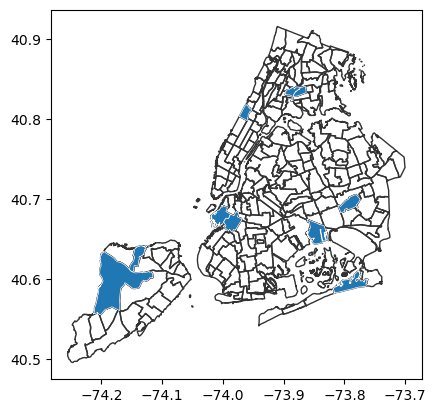

In [4]:
sensor_geo = sensor_geo[ ~sensor_geo['sensor_display_name'].str.contains('(RETIRED)' ) ]

ntas_withSensors = ntas.sjoin(sensor_geo.reset_index(), how='inner', predicate='intersects')
ntas_withSensors = ntas_withSensors.drop_duplicates(subset=['ntacode'])

display(ntas_withSensors )

base = ntas.plot( fc='none', ec = "#333" )
ntas_withSensors.plot( ax=base , ec='w', lw=0.5)

In [5]:

import requests

data_query = 'https://data.cityofnewyork.us/resource/erm2-nwe9.json'
start_date = (pd.Timestamp.today() - pd.Timedelta(days=365*2)).strftime('%Y-%m-%d')

# Add more descriptors here
descriptors = ['Street Flooding (SJ)','Catch Basin Clogged/Flooding (Use Comments) (SC)','Sewer Backup (Use Comments) (SA)','Failure To Retain Water/Improper Drainage- (LL103/89)','Manhole Overflow (Use Comments) (SA1)','Snow/Ice']
descriptors_filter = ' OR '.join([f"descriptor='{d}'" for d in descriptors])
selectors = 'unique_key,created_date,agency,complaint_type,descriptor,status,latitude,longitude'

all_311 = pd.DataFrame()
for i,nta in ntas_withSensors.iterrows():
    
    print(f"Processing {nta.ntacode}")
    polygon = nta.geometry

    # date_extract_y(created_date)>2022`
    url = f"{data_query}?$where=within_polygon(location, '{polygon}') AND created_date>'{start_date}' AND ({descriptors_filter})&$select={selectors}&$limit=5000"

    response = requests.get(url)
    if response.status_code != 200:
        print(f"Error {response.status_code} for {nta.ntacode}")
        continue
    else:

        data = response.json()
        temp_data = pd.DataFrame( data )
        temp_data['ntacode'] = nta.ntacode
        temp_data['ntaname'] = nta.ntaname

        all_311 = pd.concat( [all_311, temp_data] )

all_311

Processing QN01
Processing MN09
Processing SI05
Error 400 for SI05
Processing QN12
Error 414 for QN12
Processing SI28
Processing BX08
Processing BX75
Processing QN57
Processing BK33
Processing BK37


,unique_key,created_date,agency,complaint_type,descriptor,status,latitude,longitude,ntacode,ntaname
0,57534455,2023-05-07T11:50:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.688191445873954,-73.79445402829218,QN01,South Jamaica
1,57531960,2023-05-07T09:02:00.000,DEP,Sewer,Street Flooding (SJ),Closed,40.697080037613894,-73.77871395480597,QN01,South Jamaica
2,57537586,2023-05-07T08:56:00.000,DEP,Sewer,Manhole Overflow (Use Comments) (SA1),Closed,40.697080037613894,-73.77871395480597,QN01,South Jamaica
3,57517483,2023-05-05T14:11:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.69227449327973,-73.79075245786545,QN01,South Jamaica
4,57494078,2023-05-03T10:05:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.688191445873954,-73.79445402829218,QN01,South Jamaica
...,...,...,...,...,...,...,...,...,...,...
666,50591384,2021-05-17T10:37:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.67128727221396,-73.9812401031641,BK37,Park Slope-Gowanus
667,50562546,2021-05-14T07:38:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.66364936020111,-73.98707431076895,BK37,Park Slope-Gowanus
668,50551243,2021-05-13T13:35:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.66364936020111,-73.98707431076895,BK37,Park Slope-Gowanus
669,50538949,2021-05-12T17:53:00.000,DEP,Sewer,Sewer Backup (Use Comments) (SA),Closed,40.66364936020111,-73.98707431076895,BK37,Park Slope-Gowanus


2021-05-12T17:19:00.000 2023-05-03T17:53:00.000


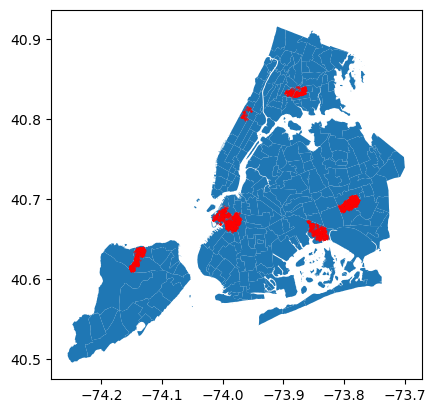

In [6]:
base = ntas.plot()
gpd.GeoDataFrame(
    all_311,
    geometry=gpd.points_from_xy(all_311.longitude, all_311.latitude),
    crs=4326
).plot( ax = base, color='red', markersize=0.1 );

print( temp_data['created_date'].min() , temp_data['created_date'].max() )


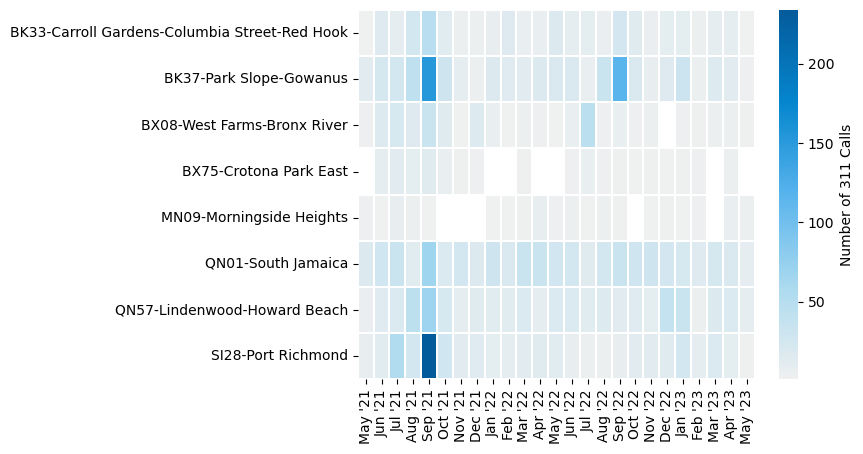

In [7]:
all_311['month'] = pd.to_datetime(all_311['created_date']).dt.month
all_311['month'] = all_311['month'].astype(str).str.zfill(2)
all_311['year'] = pd.to_datetime(all_311['created_date']).dt.year

pt = pd.pivot_table(
    all_311,
    index=['ntacode','ntaname'],
    columns=['year','month'],
    values='unique_key',
    aggfunc=len
)


pt.columns = [ pd.to_datetime(f"{c[0]}-{c[1]}-01").strftime("%b '%y") for c in pt.columns ]
pt

def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    return color_ramp

custom_ramp = make_Ramp( ['#EFF0F0',"#ABDAEF","#58B4ED", '#0586CE', '#045B9B'] ) 

sns.heatmap(
    pt,
    linewidths=0.1,
    linecolor='white',
    cbar_kws={'label': 'Number of 311 Calls'},
    cmap = custom_ramp
)

plt.ylabel('')
plt.xlabel('');

In [8]:
all_311.groupby(['ntacode','month','year']).size().max()

234

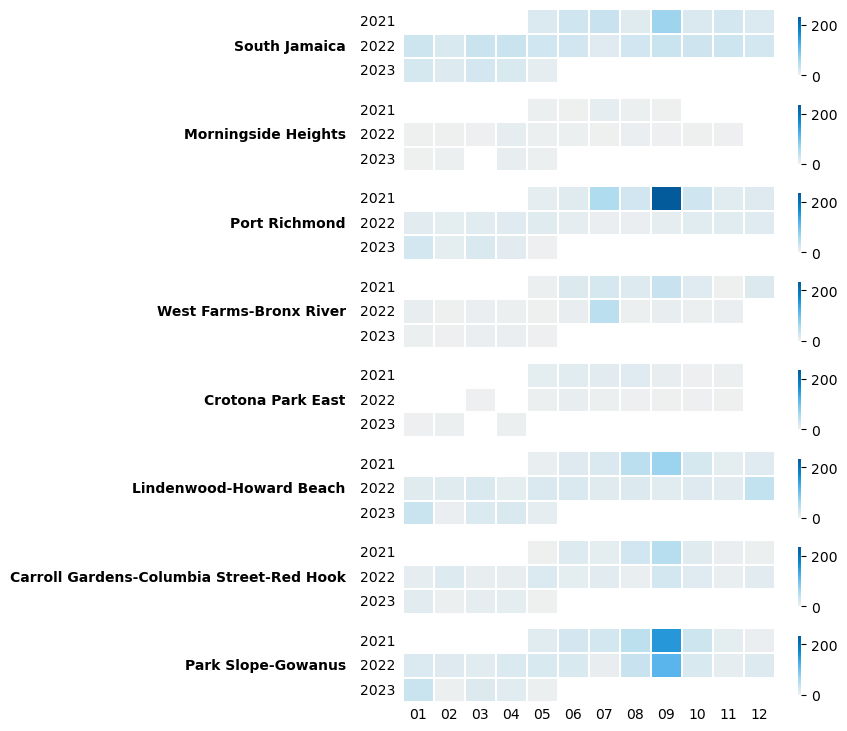

In [9]:
fig,axs = plt.subplots(figsize=(6,9), nrows = all_311['ntacode'].nunique(), sharex=True )

# make an axis for each ntacode
for count,ntacode in enumerate(all_311['ntacode'].unique()):
    ax = axs[count]

    # Filter
    temp = all_311[ all_311['ntacode']==ntacode ]

    # pivot -> over unique_key counts to simplify the data
    pt_yearcomp = pd.pivot_table(
        temp,
        index=['ntaname','year'],
        columns=['month'],
        values='unique_key',
        aggfunc="nunique",
    )

    #  Custom map is gererated above to be used in cmap
    #  vmax is the highest off all ntacodes complaints.
    sns.heatmap(
        pt_yearcomp,
        linewidths=0.1,
        linecolor='white',
        cbar_kws={'label': '', 'shrink':0.8 },
        cmap = custom_ramp,
        ax = ax,
        vmin = 0,
        vmax = all_311.groupby(['ntacode','month','year']).size().max(),
        cbar = True
    )

    #  Styling
    ax.set_ylabel( temp['ntaname'].unique()[0] , rotation=0, ha='right', va='center', labelpad=10 , fontweight='bold' )
    ax.set_xlabel('')

    # replace y-ticks
    ax.set_yticks( np.arange(0.5, len(pt_yearcomp.index), 1) )
    ax.set_yticklabels( pt_yearcomp.index.get_level_values(1).unique() )

    ax.tick_params(axis='y', which='major', pad=2, left = False )
    ax.tick_params(axis='x', which='major', pad=0, bottom = False )


C:\Users\cansu\AppData\Local\Temp\ipykernel_20520\1163451188.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  temp['week'] = pd.to_datetime(temp['created_date']).dt.week


[Text(0.5, 0, 'January'),
 Text(1.5, 0, 'January'),
 Text(2.5, 0, 'January'),
 Text(3.5, 0, 'January'),
 Text(4.5, 0, 'January'),
 Text(5.5, 0, 'February'),
 Text(6.5, 0, 'February'),
 Text(7.5, 0, 'February'),
 Text(8.5, 0, 'February'),
 Text(9.5, 0, 'March'),
 Text(10.5, 0, 'March'),
 Text(11.5, 0, 'March'),
 Text(12.5, 0, 'March'),
 Text(13.5, 0, 'March'),
 Text(14.5, 0, 'April'),
 Text(15.5, 0, 'April'),
 Text(16.5, 0, 'April'),
 Text(17.5, 0, 'April'),
 Text(18.5, 0, 'May'),
 Text(19.5, 0, 'May'),
 Text(20.5, 0, 'May'),
 Text(21.5, 0, 'May'),
 Text(22.5, 0, 'June'),
 Text(23.5, 0, 'June'),
 Text(24.5, 0, 'June'),
 Text(25.5, 0, 'June'),
 Text(26.5, 0, 'June'),
 Text(27.5, 0, 'July'),
 Text(28.5, 0, 'July'),
 Text(29.5, 0, 'July'),
 Text(30.5, 0, 'July'),
 Text(31.5, 0, 'July'),
 Text(32.5, 0, 'August'),
 Text(33.5, 0, 'August'),
 Text(34.5, 0, 'August'),
 Text(35.5, 0, 'August'),
 Text(36.5, 0, 'August'),
 Text(37.5, 0, 'September'),
 Text(38.5, 0, 'September'),
 Text(39.5, 0, 'Se

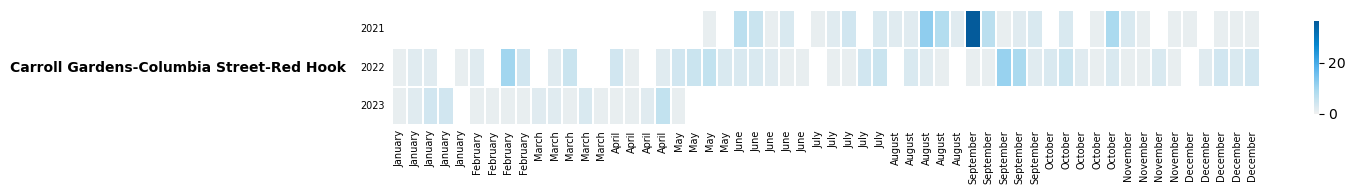

In [19]:
# For Carrol Gardens
temp = all_311[ all_311['ntaname'].str.contains('Carroll Gardens') ].copy()

# calculate the Nth week of the year the date falls in
temp['week'] = pd.to_datetime(temp['created_date']).dt.week 
# Name of the month the date falls in
temp['month_name'] = pd.to_datetime(temp['created_date']).dt.month_name()
temp['month'] = pd.to_datetime(temp['created_date']).dt.month

temp.loc[ temp['week'] == 52 , 'month'] = 12
temp.loc[ temp['week'] == 52 , 'month_name'] = 'December'

#  Pivot -> over unique_key counts to simplify the data
pt_weekcomp = pd.pivot_table(
    temp,
    index=['ntaname','year'],
    columns=['month','month_name','week'],
    values='unique_key',
    aggfunc="nunique",
)

# A single axis object
fig,ax = plt.subplots(figsize=(14,1.5))
sns.heatmap(
    pt_weekcomp,
    linewidths=0.1,
    linecolor='white',
    cbar_kws={'label': '', 'shrink':0.8 },
    cmap = custom_ramp,
    ax = ax,
    vmin = 0,
    # vmax = all_311.groupby(['ntacode','month','year']).size().max(),
    cbar = True
)

#  Styling
ax.set_ylabel( temp['ntaname'].unique()[0] , rotation=0, ha='right', va='center', labelpad=10 , fontweight='bold' )
ax.set_xlabel('')

# replace y-ticks
ax.set_yticks( np.arange(0.5, len(pt_yearcomp.index), 1) )
ax.set_yticklabels( pt_yearcomp.index.get_level_values(1).unique() )

# change x-tick fontsize
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(7)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(7)

ax.tick_params(axis='y', which='major', pad=2, left = False )
ax.tick_params(axis='x', which='major', pad=0, bottom = False )

#  get x-ticks labels, and replace
xlabels = [ item.get_text() for item in ax.get_xticklabels() ]
ax.set_xticklabels( [ x.split("-")[1] for x in xlabels ] )
